<a href="https://colab.research.google.com/github/alfn051/MachineLearningSubject/blob/main/machineLearning_subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋과 다중 퍼셉트론 분류를 이용한 이미지 분류 시스템

데이터셋 준비

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# MNIST 데이터셋 로드
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 이미지 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

모델 구성 및 훈련

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2623 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1158 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0790 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0597 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9861


테스트 세트 정확도 평가

In [6]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'정확도: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9748
정확도: 0.9747999906539917


1/1 [==============================] - 0s 82ms/step


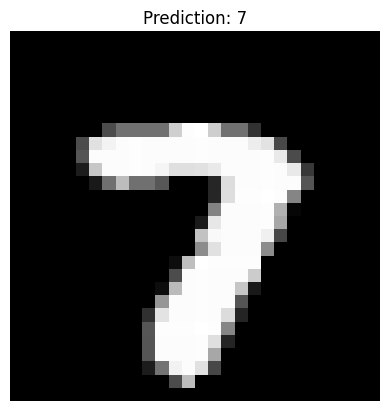

In [7]:
index = np.random.randint(0, len(X_test))
image = X_test[index]
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

plt.imshow(X_test[index], cmap='gray')
plt.title(f'Prediction: {predicted_label}')
plt.axis('off')
plt.show()

# 모델 향상

# 신경망 구조 변경

레이어 수와 뉴런의 수를 증가시켜보았다.

In [8]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),  # 변경된 뉴런 수
    keras.layers.Dense(128, activation='relu'),  # 변경된 뉴런 수
    keras.layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2086 - accuracy: 0.9370
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0583 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9891


테스트 세트 정확도 평가

In [9]:
_, accuracy = model_1.evaluate(X_test, y_test)
print(f'정확도: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9772
정확도: 0.9771999716758728


기존모델보다 정확도 0.2399% 증가하였다

# 활성화 함수 변경

은닉층의 활성화 함수로  'LeakyReLU'를 사용해 보았다.

In [10]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),  # 변경된 활성화 함수
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2672 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0858 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9850


테스트 세트 정확도 평가

In [11]:
_, accuracy = model_2.evaluate(X_test, y_test)
print(f'정확도: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9704
정확도: 0.9703999757766724


기존 모델보다 정확도 0.44% 감소하였다.

# 정규화와 드롭아웃 추가

L2정규화와 드롭아웃을 추가한다.

In [30]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# L2 정규화와 드롭아웃 추가
model_3.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model_3.add(keras.layers.Dropout(0.5))

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 5.0183 - accuracy: 0.0677
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 4.8563 - accuracy: 0.0135
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8543 - accuracy: 0.0090
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 4.8535 - accuracy: 0.0088
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8529 - accuracy: 0.0091


테스트 세트 정확도 평가

In [31]:
_, accuracy = model_3.evaluate(X_test, y_test)
print(f'정확도: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 4.8527 - accuracy: 3.0000e-04
정확도: 0.0003000000142492354


학습이 제대로 되지 않았음

# 옵티마이저 변경

RMSprop 옵티마이저를 사용

In [47]:
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 옵티마이저 변경
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

model_4.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2562 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1183 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0559 - accuracy: 0.9839


테스트 세트 정확도 평가

In [48]:
_, accuracy = model_4.evaluate(X_test, y_test)
print(f'정확도: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9774
정확도: 0.977400004863739


기존 모델보다 정확도 0.26% 증가하였다.